In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:

# Air Quality datasets 
# https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw
!wget https://aqs.epa.gov/aqsweb/airdata/hourly_42602_2017.zip
!unzip hourly_42602_2017.zip

--2020-12-17 12:45:15--  https://aqs.epa.gov/aqsweb/airdata/hourly_42602_2017.zip
Resolving aqs.epa.gov (aqs.epa.gov)... 134.67.21.26
Connecting to aqs.epa.gov (aqs.epa.gov)|134.67.21.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28265816 (27M) [application/zip]
Saving to: ‘hourly_42602_2017.zip’

hourly_42602_2017.z 100%[===================>]  26.96M  1.22MB/s    in 22s     

2020-12-17 12:45:38 (1.20 MB/s) - ‘hourly_42602_2017.zip’ saved [28265816/28265816]

Archive:  hourly_42602_2017.zip
  inflating: hourly_42602_2017.csv   


In [3]:
!ls

hourly_42602_2017.csv  hourly_42602_2017.zip


In [4]:
# Load dataset 
aq_data = pd.read_csv('./hourly_42602_2017.csv')
# aq_data = pd.read_csv('/Users/kkbankol@us.ibm.com/Downloads/hourly_42602_2017.csv')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# View first 5 rows
aq_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19


In [6]:
aq_data.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Measurement',
       'Units of Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method Type',
       'Method Code', 'Method Name', 'State Name', 'County Name',
       'Date of Last Change'],
      dtype='object')

In [7]:
aq_data['Sample Measurement'].describe()


count    3.561691e+06
mean     8.242666e+00
std      9.165297e+00
min     -5.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.120000e+01
max      1.296000e+02
Name: Sample Measurement, dtype: float64

In [8]:
# print list of all unique monitoring site numbers
aq_data['Site Num'].unique()

array([  23, 2059,   34,   19, 3002, 4011, 4019, 4020, 9997, 1011, 1028,
          5,    7,    9,   11,   12,   13, 2005,    8,    2, 1002, 1004,
       2007,  242, 2016, 4001, 5001, 1005, 1003,   14, 2012, 6001,   16,
        113, 1103, 1201, 1302, 1602, 1701, 4006, 4008, 5005, 6012, 9033,
          4,    1,    3,    6, 1016, 8001, 8005, 9001,   10,   15,   26,
         27,  306, 1234, 2002, 9004, 1006, 1008, 1014, 1017, 1022, 3005,
       4002, 8002, 1001, 1013, 1018, 1021, 1025, 2004, 2011, 4003, 3001,
       7004,   28, 7001, 7003, 9003,   25,   41,   43,   50,   51,   35,
         32,  108, 1065,   21,   18,   56,   63,   76, 3103,   22,   78,
         87,   30,   17,   67,   75, 1024, 1100,   29,   40, 2006, 4005,
       3003,   42,   44,   93,   94,   95, 1010,   20,  423,  480,  962,
         85,   86,  760,  761,  762,  540,  561, 1501, 1502, 1233,  110,
        133,  124,  125,   45,   60,   73,   37,   38,   48,  101,   65,
         33,   97, 9021, 1127,   80, 1376,  100, 40

In [9]:
# get number of aq sites in a single state, "California"
aq_data.loc[aq_data['State Name'] == "California"]['Site Num'].unique().shape

(66,)

In [10]:

# show data associated 
los_angeles_aq = aq_data.loc[ \
                     (aq_data['Longitude'] > -118.455937) & \
                     (aq_data['Longitude'] < -117.842111) & \
                     (aq_data['Latitude'] > 33.764836) & \
                     (aq_data['Latitude'] < 34.173729) ]
los_angeles_aq


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
308750,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308751,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308752,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308753,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308754,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494138,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20
494139,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20
494140,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20
494141,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20


In [11]:

import datetime as dt

# foo = ((los_angeles_aq['Date Local'].astype(str) + " " + los_angeles_aq['Time Local']) - dt.datetime(1970,1,1)).dt.total_seconds()
# los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local']))).dt.total_seconds()
los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local'])) - dt.datetime(1970,1,1)).dt.total_seconds()
# .date.astype('int64')

# los_angeles_aq['Date']


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
los_angeles_aq['Timestamp']
# import time, datetime
# s = los_angeles_aq.iloc[0]['Date Local'] + '-' + los_angeles_aq.iloc[0]['Time Local']
# int(time.mktime(datetime.datetime.strptime(s, "%Y-%d-%m-%H:%M").timetuple()))
# los_angeles_aq['Timestamp'] = pd.to_datetime([los_angeles_aq['Date Local'] + los_angeles_aq['Time Local'] ])
# los_angeles_aq.iloc[0]['Date Local'] + los_angeles_aq.iloc[0]['Time Local']

308750    1.483229e+09
308751    1.483232e+09
308752    1.483236e+09
308753    1.483240e+09
308754    1.483243e+09
              ...     
494138    1.514664e+09
494139    1.514668e+09
494140    1.514671e+09
494141    1.514675e+09
494142    1.514678e+09
Name: Timestamp, Length: 101620, dtype: float64

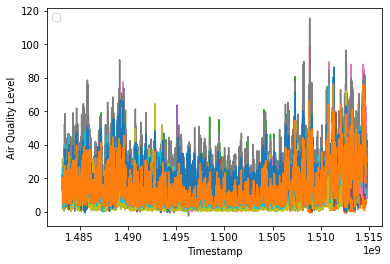

In [13]:
plt.ylabel('Air Quality Level')
plt.xlabel('Timestamp')
plt.legend( los_angeles_aq['Site Num'].unique().tolist(), loc='upper left')
# plt.legend( los_angeles_aq['Site Num'].unique().tolist() )
# colors = [plt.cm.spectral(i) for i in np.linspace(0, 1, los_angeles_aq['Site Num'].unique().shape[0])]
# ax.set_prop_cycle('color', colors)
los_angeles_aq_trimmed = los_angeles_aq
for site in los_angeles_aq['Site Num'].unique():
    plt.plot( los_angeles_aq_trimmed.loc[los_angeles_aq_trimmed['Site Num'] == site]['Timestamp'], los_angeles_aq_trimmed.loc[los_angeles_aq_trimmed['Site Num'] == site]['Sample Measurement'])


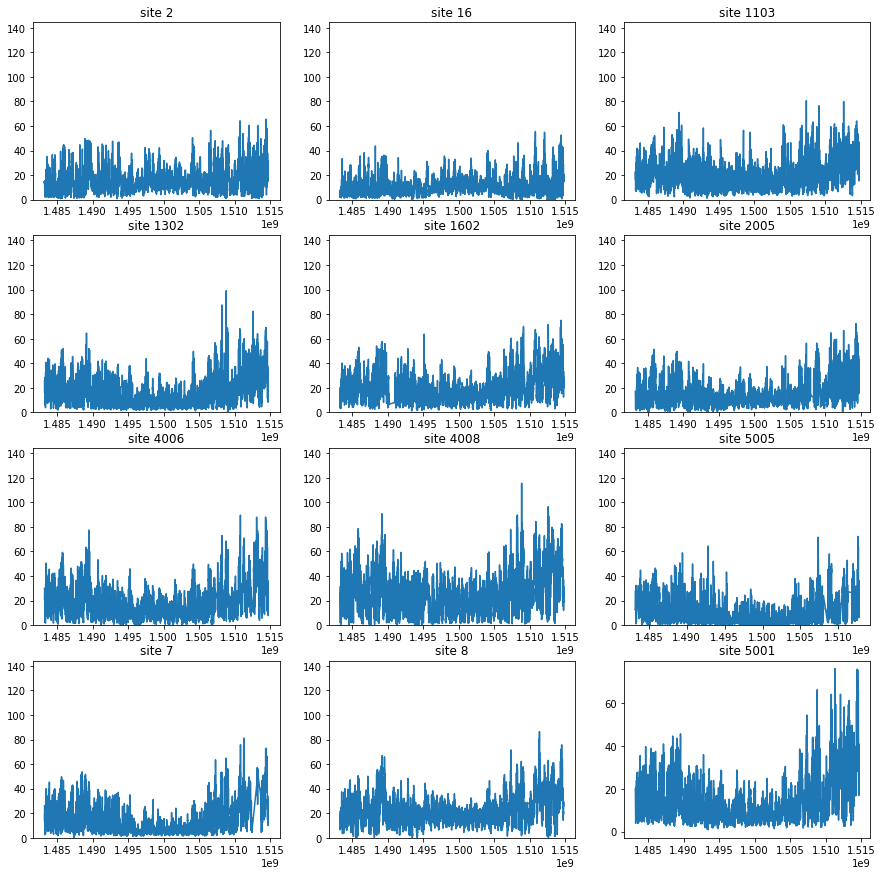

In [14]:

# Print aq changes throughout the year, and create a seperate chart for each air quality monitoring site
ncols = 3
nrows = 4 #los_angeles_aq['Site Num'].unique().shape[0]
plt.subplots(nrows, ncols, figsize=(15,15))
idx = 1
data_summary = los_angeles_aq['Sample Measurement'].describe()
for site in los_angeles_aq['Site Num'].unique():
    plt.ylim(0, data_summary['max'] * 1.25)
    plt.subplot(nrows, ncols, idx)
    plt.plot( los_angeles_aq.loc[los_angeles_aq['Site Num'] == site]['Timestamp'], los_angeles_aq.loc[los_angeles_aq['Site Num'] == site]['Sample Measurement'])
    plt.title("site " + str(site))
    idx = idx + 1

In [15]:
# extract day of week
import datetime
los_angeles_aq['Weekday'] = pd.to_datetime(los_angeles_aq['Date Local']).dt.day_name()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


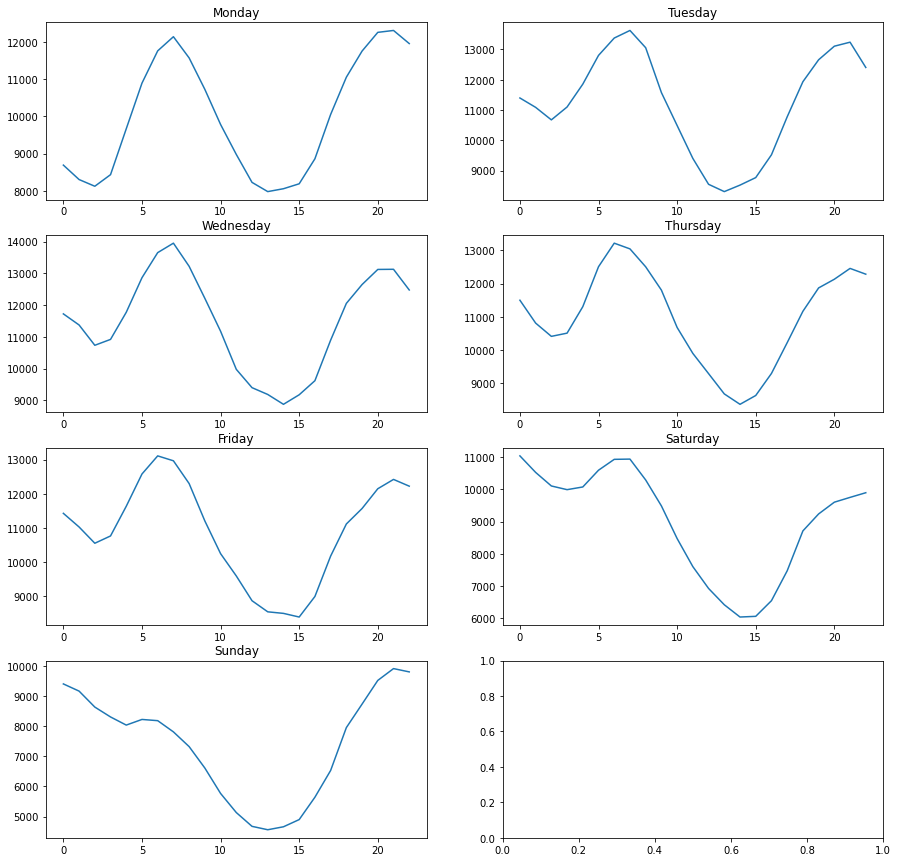

In [16]:

# Print aq changes throughout the day from 0:00 - 24:00. Break into seperate plots by weekday
nrows = 4
ncols = 2
plt.subplots(nrows, ncols, figsize=(15,15))
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
idx = 1
values_by_weekday = {}
for day in weekdays:
    plt.subplot(nrows, ncols, idx)
    # for loop 0:00 - 24:00
    # sum measurements where weekday == and time ==
    times = []
    for hour in range(0, 23):
        if hour <= 9:
          time = "0" + str(hour) + ":00"
        else:
          time = str(hour) + ":00"
        # select subset matching given weekday and hour
        subset = los_angeles_aq.loc[ (los_angeles_aq['Weekday'] == day) & (los_angeles_aq['Time Local'] == time) ]['Sample Measurement']
        #         print(subset.mean())
        times.append(subset.sum())
    values_by_weekday[day] = times
    plt.plot( times )
    plt.title(day)
    idx = idx + 1

# Problem Statement
Air pollution has been linked to higher rates of cancer, heart disease, stroke, and respiratory diseases such as asthma.
From smog hanging over cities to smoke inside the home, air pollution poses a major threat to health and climate.

# The General Object
The general objet of this projet is to analyse the Air Quality of Califonia and its region.

# The three Specific Objectives Of the project
1). Is to load dataset of air quality dat

2). Is to measure air quality sample

3). Is to get number of air quality sites in a single state, "California" 

# The reserch Question of this project

1). What the dataset of air quality of "California"?

2). What is Los-Angeles Air Quality TimeStamp?

3). What is  Los-Angeles Air Quality throughout the year?

Etc.

# All The Models Developed In This Project

We Analyse Air Quality Dataset Then 
we load dataset of Air Quality Data the 
We viewed the 5 first rows Air Quality Dataset then
We viewed the Quality of all columns then
We described the Air Quality Sample Measurement then
We printed the list of all unique monitering sites then
We got a number of Air Quality Site in a single State then
We viewed air Quality data associated with Los-Angeles then
We Imported datetime then
We viewed the chart Of Air Quality level then
We Printed the Air Quality Changes throughout the year and we created a seperate chart for each air quality monitoring site then
We extracted day of week of los-Angeles Air Quality then
We Print Air Quality changes throughout the day from 0:00 - 24:00. Break into seperate plots by weekday then



# The New Ideas Proposed in This Project Are

To Find Out Air Quality changes throughout the year, and create a seperate chart for each air quality monitoring site

To extract day of week Of Los-Angeles Air Quality And

To Find Out Air Quality changes throughout the day from 0:00 - 24:00. Break into seperate plots by weekday

# The Conclution of The Project 

In this project Analysed Air Quality Dataset after it loaded the dataset of Air Quality Data.
it viewed the 5 first rows Air Quality Dataset.
the Quality of all columns were also viewed then it described the Air Quality Sample Measurement 
Printed the list of all unique monitering sites 
It also Printed out a number of Air Quality Site in a single State
The data associated with Los-Angeles Air Quality were also viewd
it also Imported datetime and viewed the chart Of Air Quality level 
It also Printed the Air Quality Changes throughout the year and we created a seperate chart for each air quality monitoring site then We extracted day of week of los-Angeles Air Quality.
Finaly It Print Air Quality changes throughout the day from 0:00 - 24:00. Break into seperate plots by weekday then



# The Challenges Of The Project 

Analysing The Air Quality of The different region maintaining authenticity of Air Quality Data Of An other Region...

# Shukuru Stephano

# 030-307

# BCS-6

# Cavendish University Uganda